In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:
glob.glob('../data/unzipped/*youtube*-vpn*')

['../data/unzipped/pgaddiso-youtube-1x-720p-vpn-linux-clean-20201102-0.csv',
 '../data/unzipped/pgaddiso-youtube-1x-720p-vpn-linux-clean-20201102-1.csv',
 '../data/unzipped/pgaddiso-youtube-1x-720p-vpn-linux-clean-20201102b-0.csv',
 '../data/unzipped/pgaddiso-youtube-1x-720p-vpn-linux-clean-20201102b-1.csv',
 '../data/unzipped/pgaddiso-youtube-1x-720p-vpn-linux-clean-20201102b-2.csv',
 '../data/unzipped/pgaddiso-youtube-1x-720p-vpn-linux-clean-20201102b-3.csv',
 '../data/unzipped/pgaddiso-youtube-1x-720p-vpn-linux-clean-20201102b-4.csv',
 '../data/unzipped/pgaddiso-youtube-1x-720p-vpn-linux-clean-20201102b-5.csv']

In [3]:
df = pd.read_csv('../data/unzipped/pgaddiso-youtube-1x-720p-vpn-linux-clean-20201102-0.csv')

In [ ]:
# Basically, recreate 'flows' for given IP pair and protocol

In [32]:
df.groupby(['IP1', 'IP2'])

3078936

In [ ]:
# Simple aggregation -- don't care about IPs

In [19]:
strags = df.filter(like='packet').apply(lambda ser: ser.str.split(';').str[:-1]).sum()
strags

packet_times    [1604366490254, 1604366490255, 1604366490664, ...
packet_sizes    [72, 126, 118, 118, 83, 202, 72, 126, 907, 118...
packet_dirs     [2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, ...
dtype: object

In [33]:
dd = pd.DataFrame({
    'time': strags.packet_times,
    'size': strags.packet_sizes,
    'dir' : strags.packet_dirs
})
dd

,time,size,dir
0,1604366490254,72,2
1,1604366490255,126,1
2,1604366490664,118,1
3,1604366490688,118,2
4,1604366490622,83,2
...,...,...,...
31408,1604366790975,189,1
31409,1604366790975,216,1
31410,1604366790975,189,1
31411,1604366790975,216,1


In [39]:
dd.astype(int).dtypes

time    int64
size    int64
dir     int64
dtype: object

In [4]:
def agg_extended(df):
    lists = df.filter(like='packet').apply(lambda ser: ser.str.split(';').str[:-1]).sum()
    return pd.DataFrame({
        'ptime': lists.packet_times,
        'psize': lists.packet_sizes,
        'pdir' : lists.packet_dirs
    }).astype(int)

## Time to compare all video packets to browsing packets

In [5]:
video = pd.read_csv('../data/unzipped/pgaddiso-youtube-1x-720p-vpn-linux-clean-20201102b-2.csv')
browse = pd.read_csv('../data/unzipped/pgaddiso-novideo-novpn-linux-20201102-0.csv')

In [21]:
allvidnames = glob.glob('../data/unzipped/*-youtube-*-vpn-*b-*.csv')
allvidnames

['../data/unzipped/pgaddiso-youtube-1x-720p-vpn-linux-clean-20201102b-0.csv',
 '../data/unzipped/pgaddiso-youtube-1x-720p-vpn-linux-clean-20201102b-1.csv',
 '../data/unzipped/pgaddiso-youtube-1x-720p-vpn-linux-clean-20201102b-2.csv',
 '../data/unzipped/pgaddiso-youtube-1x-720p-vpn-linux-clean-20201102b-3.csv',
 '../data/unzipped/pgaddiso-youtube-1x-720p-vpn-linux-clean-20201102b-4.csv',
 '../data/unzipped/pgaddiso-youtube-1x-720p-vpn-linux-clean-20201102b-5.csv']

In [22]:
allbrowsenames = glob.glob('../data/unzipped/*-novideo*.csv')
allbrowsenames

['../data/unzipped/pgaddiso-novideo-novpn-linux-20201102-0.csv',
 '../data/unzipped/pgaddiso-novideo-novpn-linux-20201102-1.csv',
 '../data/unzipped/pgaddiso-novideo-novpn-linux-20201102-2.csv',
 '../data/unzipped/pgaddiso-novideo-novpn-linux-20201102-3.csv',
 '../data/unzipped/pgaddiso-novideo-novpn-linux-20201102-4.csv',
 '../data/unzipped/pgaddiso-novideo-novpn-linux-20201102-5.csv']

In [23]:
allvideo = [
    pd.read_csv(vidname) for vidname in allvidnames
]
allbrowse = [
    pd.read_csv(browsename) for browsename in allbrowsenames
]

In [24]:
vfs = [agg_extended(v) for v in allvideo]
bfs = [agg_extended(b) for b in allbrowse]

In [10]:
video.head(3)

,Time,IP1,Port1,IP2,Port2,Proto,1->2Bytes,2->1Bytes,1->2Pkts,2->1Pkts,packet_times,packet_sizes,packet_dirs
0,1604384160,10.0.0.233,54940,255.255.255.255,10001,17,154,0,1,0,1604384160920;,154;,1;
1,1604384161,FE80::56A6:5CFF:FE92:A02F,0,FF02::1,0,58,160,0,1,0,1604384161576;,160;,1;
2,1604384161,10.0.0.236,34988,137.110.0.69,443,17,733,532,5,4,1604384161591;1604384161591;1604384161591;1604...,177;162;138;138;138;138;138;118;118;,1;1;1;2;2;1;2;2;1;


In [11]:
vf.head(20)

,ptime,psize,pdir
0,1604384160920,154,1
1,1604384161576,160,1
2,1604384161591,177,1
3,1604384161591,162,1
4,1604384161591,138,1
5,1604384161675,138,2
6,1604384161675,138,2
7,1604384161676,138,1
8,1604384161680,138,2
9,1604384161958,118,2


In [25]:
dfs = pd.concat([
    *[v.assign(activity='video') for v in vfs],
    *[b.assign(activity='browsing') for b in bfs]
])

In [27]:
dfs.groupby('activity').describe()[['psize', 'pdir']].round(2).T

activity      browsing      video
psize count  126032.00  335392.00
      mean      547.18     964.46
      std       629.77     555.72
      min        28.00      28.00
      25%        60.00     166.00
      50%       111.00    1346.00
      75%      1436.00    1346.00
      max      1500.00    1366.00
pdir  count  126032.00  335392.00
      mean        1.56       1.71
      std         0.50       0.45
      min         1.00       1.00
      25%         1.00       1.00
      50%         2.00       2.00
      75%         2.00       2.00
      max         2.00       2.00

[Text(0, 0, 'browsing'), Text(0, 0, 'streaming')]

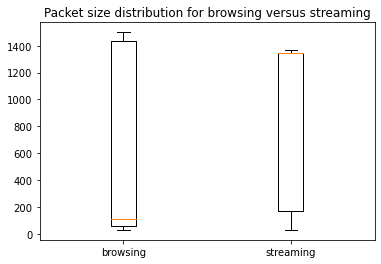

In [46]:
fix, ax = plt.subplots()
plt.boxplot(dfs.loc[dfs.activity == 'browsing', 'psize'], positions=[1])
plt.boxplot(dfs.loc[dfs.activity == 'video', 'psize'], positions=[2])
plt.title('Packet size distribution for browsing versus streaming')
ax.set_xticklabels(['browsing', 'streaming'])


Text(0, 0.5, 'Density')

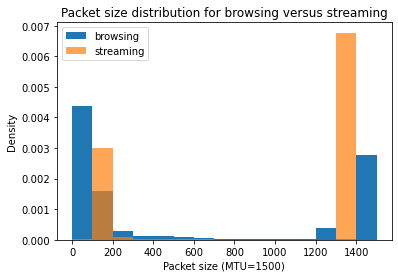

In [60]:
fix, ax = plt.subplots()
config = {
    'alpha': 0.7,
    'bins': np.arange(0, 1500+100, 100),
    'density': True
}

plt.hist(dfs.loc[dfs.activity == 'browsing', 'psize'], **{**config, 'alpha':1})
plt.hist(dfs.loc[dfs.activity == 'video', 'psize'], **config)
plt.title('Packet size distribution for browsing versus streaming')
plt.legend(labels=['browsing', 'streaming'])
plt.xlabel('Packet size (MTU=1500)')
plt.ylabel('Density')

In [68]:
dfs.loc[dfs.activity == 'browsing', 'pdir'].value_counts()

2    70866
1    55166
Name: pdir, dtype: int64

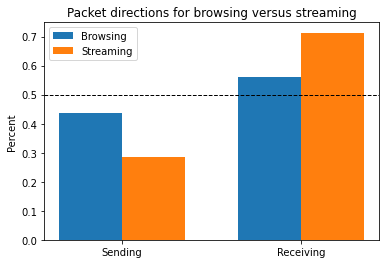

In [92]:
fix, ax = plt.subplots()
config = {
#     'alpha': 0.7,
#     'bins': np.arange(0, 1500+100, 100),
#     'density': True
}
width = 0.35

bdirs = dfs.loc[dfs.activity == 'browsing', 'pdir'].value_counts(True)
vdirs = dfs.loc[dfs.activity == 'video', 'pdir'].value_counts(True)

ax.bar(bdirs.index-width/2, bdirs, width, label='Browsing')
ax.bar(vdirs.index+width/2, vdirs, width, label='Streaming')
# plt.hist(dfs.loc[dfs.activity == 'video', 'pdir'], **config)
plt.title('Packet directions for browsing versus streaming')
ax.legend()
ax.set_xticks([1,2])
ax.set_xticklabels(['Sending', 'Receiving'])
plt.ylabel('Percent')
ax.axhline(0.5, c='k', linestyle='dashed', linewidth=1)

In [121]:
btimes.min()

Timestamp('2020-11-03 05:26:16.087000')

In [126]:
vtimes.max().timestamp()

1604385363.563

In [110]:
_.timestamp(unit=s)

1604381176.087

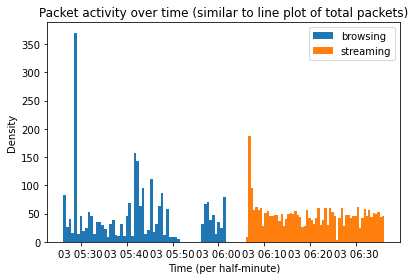

In [133]:
fix, ax = plt.subplots()
config = {
#     'alpha': 0.7,
    'bins': 60,
    'density': True
}

btimes = pd.to_datetime(dfs.loc[dfs.activity == 'browsing', 'ptime'], unit='ms')
vtimes = pd.to_datetime(dfs.loc[dfs.activity == 'video', 'ptime'], unit='ms')

plt.hist(btimes, **config)
plt.hist(vtimes, **config)
plt.title('Packet activity over time (similar to line plot of total packets)')
plt.legend(labels=['browsing', 'streaming'])
plt.xlabel('Time (per half-minute)')
plt.ylabel('Density')
# ax.set_xticks([
#     d.timestamp() for d in
#     [btimes.min(), btimes.max(), vtimes.min(), vtimes.max()]
# ])
plt.tight_layout()

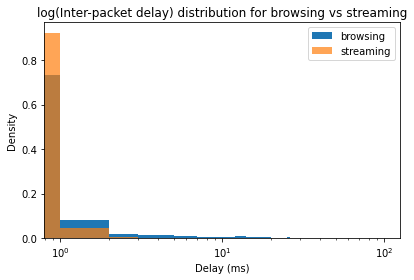

In [159]:
fix, ax = plt.subplots()
config = {
    'alpha': 0.7,
    'bins': np.arange(0, 100, 1),
    'density': True
}

bdiffs = dfs.loc[dfs.activity == 'browsing', 'ptime'].sort_values().diff()
vdiffs = dfs.loc[dfs.activity == 'video', 'ptime'].sort_values().diff()

plt.hist(bdiffs, **{**config, 'alpha':1})
plt.hist(vdiffs, **config)
plt.title('log(Inter-packet delay) distribution for browsing vs streaming')
plt.legend(labels=['browsing', 'streaming'])
plt.xlabel('Delay (ms)')
plt.ylabel('Density')
plt.xscale('log')
# ax.set_xticklabels([10, 100])
plt.tight_layout()

In [150]:
video.head()

,Time,IP1,Port1,IP2,Port2,Proto,1->2Bytes,2->1Bytes,1->2Pkts,2->1Pkts,packet_times,packet_sizes,packet_dirs
0,1604384160,10.0.0.233,54940,255.255.255.255,10001,17,154,0,1,0,1604384160920;,154;,1;
1,1604384161,FE80::56A6:5CFF:FE92:A02F,0,FF02::1,0,58,160,0,1,0,1604384161576;,160;,1;
2,1604384161,10.0.0.236,34988,137.110.0.69,443,17,733,532,5,4,1604384161591;1604384161591;1604384161591;1604...,177;162;138;138;138;138;138;118;118;,1;1;1;2;2;1;2;2;1;
3,1604384161,FE80::E89D:3F75:7882:65A6,0,FF02::16,0,0,136,0,1,0,1604384161591;,136;,1;
4,1604384162,FE80::E89D:3F75:7882:65A6,0,FF02::16,0,0,136,0,1,0,1604384162191;,136;,1;


In [151]:
vflow = agg_extended(video[video.IP2 == '137.110.0.69'])
vflow

,ptime,psize,pdir
0,1604384161591,177,1
1,1604384161591,162,1
2,1604384161591,138,1
3,1604384161675,138,2
4,1604384161675,138,2
...,...,...,...
48532,1604384458064,118,1
48533,1604384458092,118,2
48534,1604384458154,118,2
48535,1604384460182,170,2


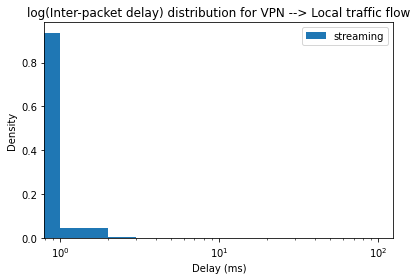

In [171]:
vflow[vflow.pdir == 2].ptime.diff().plot.hist(bins=np.arange(0,100,1), density=True)
plt.title('log(Inter-packet delay) distribution for VPN --> Local traffic flow')
plt.legend(labels=['streaming'])
plt.xlabel('Delay (ms)')
plt.ylabel('Density')
plt.xscale('log')
plt.tight_layout()

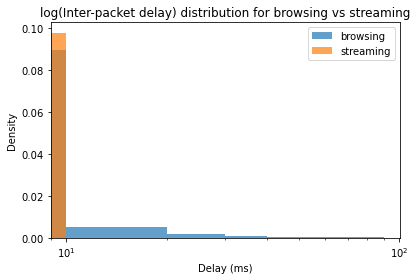

In [148]:
fix, ax = plt.subplots()
config = {
    'alpha': 0.7,
    'bins': np.arange(0, 100, 10),
    'density': True
}

bdiffs = dfs.loc[dfs.activity == 'browsing', 'ptime'].sort_values().diff()
vdiffs = dfs.loc[dfs.activity == 'video', 'ptime'].sort_values().diff()

plt.hist(bdiffs, **config)
plt.hist(vdiffs, **config)
plt.title('log(Inter-packet delay) distribution for browsing vs streaming')
plt.legend(labels=['browsing', 'streaming'])
plt.xlabel('Delay (ms)')
plt.ylabel('Density')
plt.xscale('log')
# ax.set_xticklabels([10, 100])
plt.tight_layout()

In [86]:
# Obviously not perfect -- but goes to show that even just looking at the
# average packet size can be indication of whether or not streaming is occurring
#
# Additionally, while direction 2 doesn't *always* mean receiving data, this
# does seem to suggest that we can see we're receiving more than we're sending.
#
# This can work in our favor since we noticed that *our* VPN uses almost all UDP

In [85]:
video[video.IP2.str.startswith('137')].Proto.value_counts()

17    239
6      12
Name: Proto, dtype: int64

In [138]:
def packetdiffs(df):
    return np.hstack(
        df['packet_times']
        .apply(lambda pstring: np.diff(
            [int(t) for t in pstring.split(';')[:-1]]
        ))
    )

In [139]:
vdiffs = packetdiffs(video)
bdiffs = packetdiffs(browse)

(array([0.90559299, 0.0572186 , 0.00924187, 0.00555985, 0.00537575,
        0.00544939, 0.0041975 , 0.00235649, 0.00500755]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

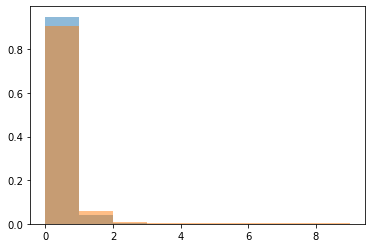

In [152]:
bins = np.arange(0, 10, 1)

ax = plt.hist(vdiffs, density=True, alpha=0.5, bins=bins)
plt.hist(bdiffs, density=True, alpha=0.5, bins=bins)

In [155]:
vdiffs.mean()

2.1958057851239667

In [157]:
vdiffs.std()

25.410816069493954

In [156]:
bdiffs.mean()

5.328427291798475

In [158]:
bdiffs.std()

34.29519342054446